In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.8 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 448x640 1 cat, 1 dog, 2524.9ms
Speed: 32.7ms preprocess, 2524.9ms inference, 36.0ms postprocess per image at shape (1, 3, 448, 640)


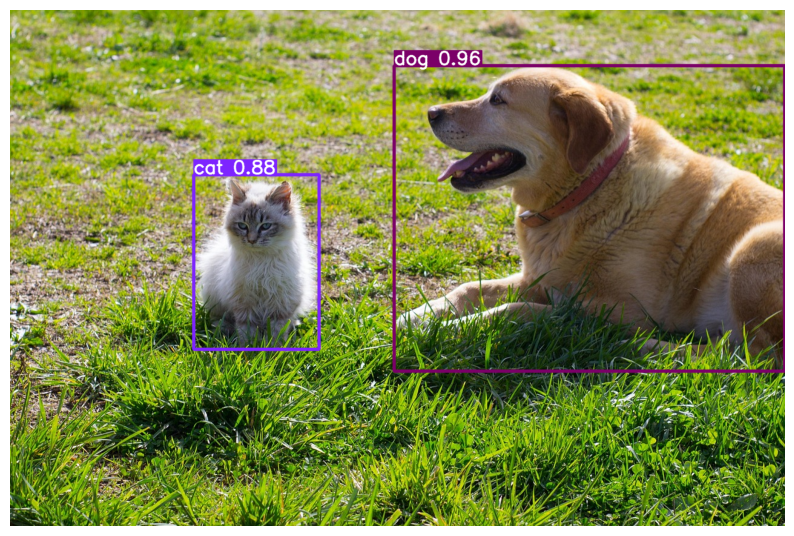

In [2]:
from ultralytics import YOLO
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Lade das YOLOv8 Modell
model = YOLO('yolo11x.pt')  # Lade ein kleines Modell. Du kannst auch 'yolov8s.pt', 'yolov8m.pt', etc. verwenden.

# Lade ein Beispielbildes von einer URL
image_url = "https://cdn.pixabay.com/photo/2020/02/06/15/39/dog-4824693_1280.jpg"  # Beispielbild - ersetze dies mit deiner URL
response = requests.get(image_url, stream=True)
response.raise_for_status()
image = Image.open(BytesIO(response.content))

# Führe die Objekterkennung aus
results = model(image)

# Zeige das Ergebnis mit Rechtecken an
for r in results:
    im_array = r.plot()  # Plotten der Ergebnisse mit den Bounding Boxes
    im = Image.fromarray(im_array[..., ::-1]) # Konvertieren des NumPy-Arrays zu einem PIL-Bild
    plt.figure(figsize=(10, 10))
    plt.imshow(im)
    plt.axis("off")
    plt.show()
